In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
# Import data
data = pd.read_csv('kaggle_data/train_data.csv',header=None)
labels = pd.read_csv('kaggle_data/train_labels.csv',header=None)
# 0. Remove features with variance 0
X_var = np.var(data.values,axis=0)
remove_indices = np.where(X_var == 0)[0]
data = data.drop(columns=remove_indices)
data.shape

(4363, 260)

In [84]:
# TODO: visualize variances of features
# TODO: visualize correlation of features
# TODO: visualize "importance" of features

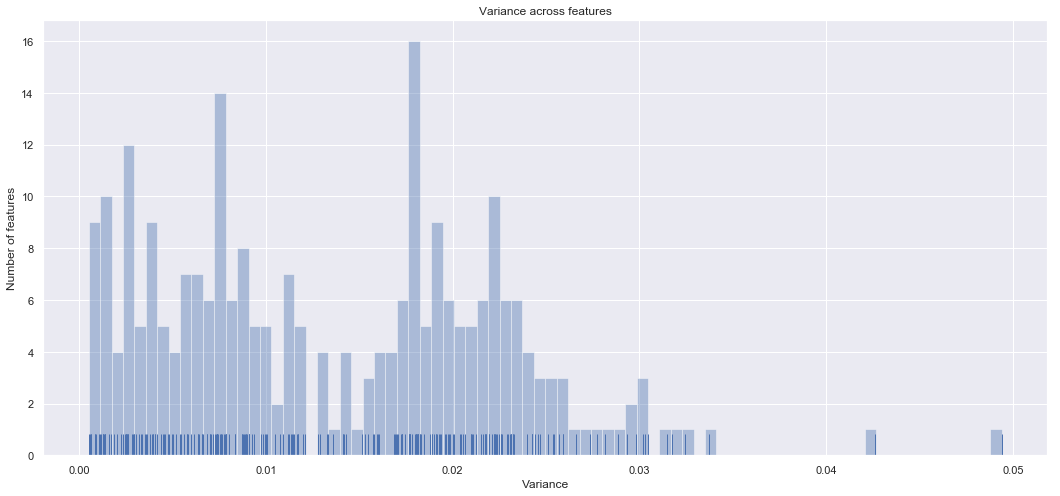

In [124]:
# Variances of features

X = data.values
# 1. Normalize data
X_norm = (X - X.min(axis=0))/(X.max(axis=0) - X.min(axis=0))
# 2. Calculate variance for each feature
X_var_norm = np.var(X_norm,axis=0)
# 3. Visualize variance
f, ax = plt.subplots(figsize=(18, 8))
sns.set(color_codes=True)
sns.distplot(X_var_norm,kde=False,rug=True,bins=80);
ax.set(xlabel='Variance', ylabel='Number of features');
ax.set_title("Variance across features");

Largest correlation:  0.9953987162062764
Indeces with stronger correlance than  0.995 :
 [ 14  15  16 110 111 112] 
 [110 111 112  14  15  16]


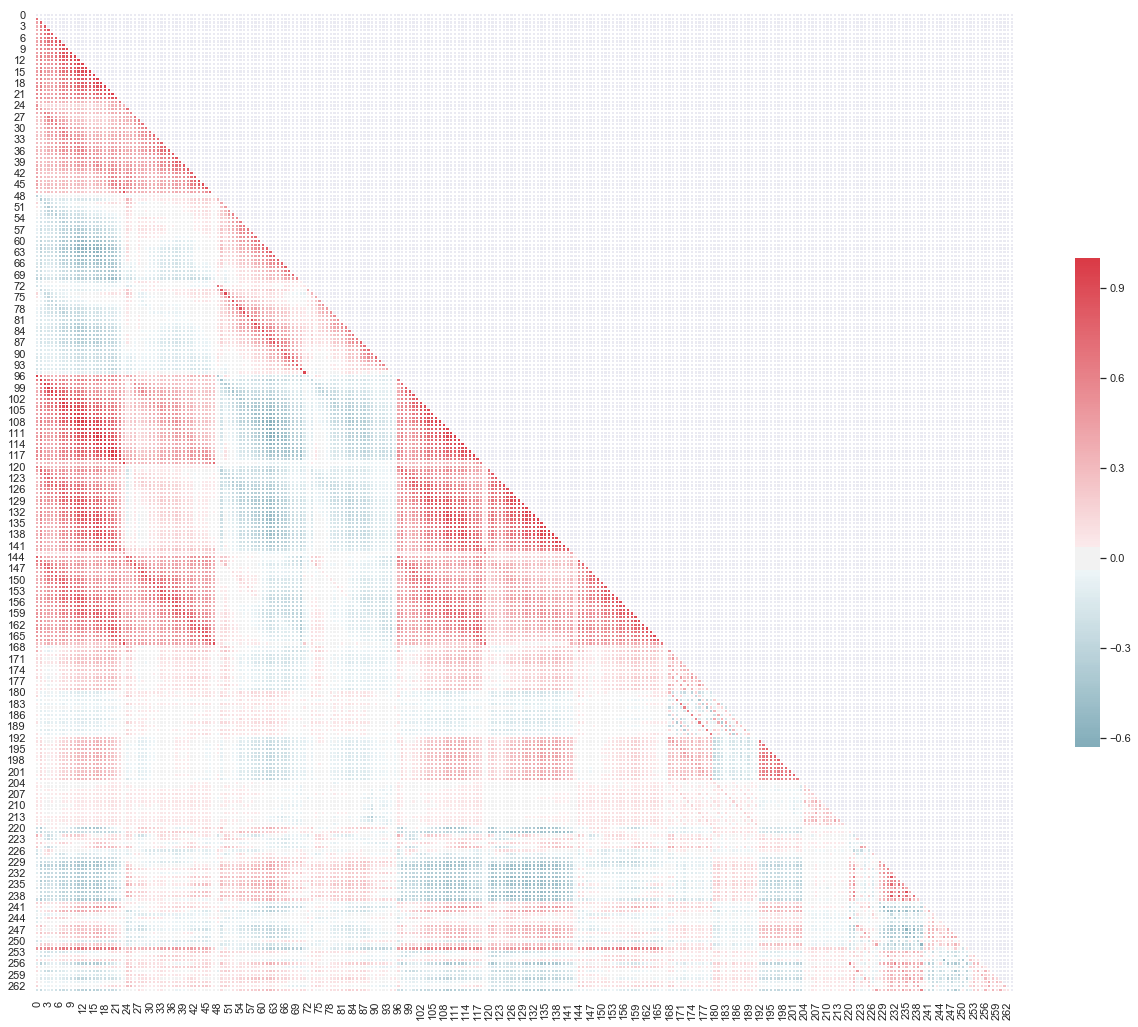

In [122]:
# Correlation between features

corr = data.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 18))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
COR_THR  = 0.995
# Analyze distribution of correlation coefficients
cor_m = corr.values
# Remove 1s from diagonal
for i in range(cor_m.shape[0]):
    cor_m[i,i] = -10
print("Largest correlation: ",cor_m.max())
indeces = np.where(cor_m > COR_THR)
print("Indeces with stronger correlance than ",COR_THR,":\n",indeces[0],"\n",indeces[1])